In [12]:
import SimpleITK as sitk
import matplotlib.pyplot as plt


In [6]:
folder_path = "C:/Users/babar/Desktop/Project - 1/vhm_head"

In [7]:
reader = sitk.ImageSeriesReader()
dicom_series = reader.GetGDCMSeriesFileNames(folder_path)
print(dicom_series)

('C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1001.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1002.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1003.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1004.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1005.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1006.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1007.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1008.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1009.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1010.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1011.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1012.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1013.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1014.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1015.dcm', 'C:/Users/babar/Desktop/Project - 1/vhm_head\\vhm.1016.dcm', 'C:/Users/babar/Desktop

In [8]:
image = sitk.ReadImage(dicom_series)

In [9]:
image_array = sitk.GetArrayFromImage(image)

In [10]:
image_array.shape

(245, 512, 512)

In [19]:
bone_min_intensity = 300  # Minimum intensity for bones
bone_max_intensity = 1017  # Maximum intensity for bones

# Apply intensity windowing to highlight bones (setting other tissues as transparent)
# windowed_image = sitk.IntensityWindowing(image, bone_min_intensity, bone_max_intensity, 0, 255)

threshold_value = 400  # Threshold value for bone removal
thresholded_image = sitk.BinaryThreshold(image, lowerThreshold=threshold_value, upperThreshold=1017, insideValue=1, outsideValue=0)


# Convert to a NumPy array for further processing or visualization
numpy_array = sitk.GetArrayFromImage(thresholded_image)

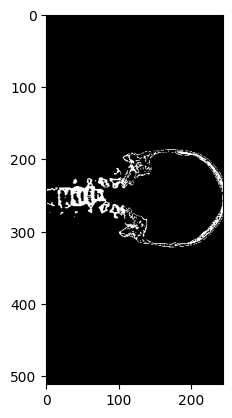

In [20]:
plt.imshow(numpy_array[:, 256, :].T, cmap='gray')  # Assuming you want to visualize the middle slice
plt.show()

In [21]:
import vtk

In [22]:
vtk_image = vtk.vtkImageData()
vtk_image.SetDimensions(numpy_array.shape[2], numpy_array.shape[1], numpy_array.shape[0])
vtk_image.AllocateScalars(vtk.VTK_DOUBLE, 1)

In [23]:
for z in range(numpy_array.shape[0]):
    for y in range(numpy_array.shape[1]):
        for x in range(numpy_array.shape[2]):
            vtk_image.SetScalarComponentFromDouble(x, y, z, 0, numpy_array[z, y, x])

In [24]:
volume_property = vtk.vtkVolumeProperty()
volume_property.ShadeOn()
volume_property.SetInterpolationTypeToLinear()

In [25]:
color_func = vtk.vtkColorTransferFunction()
opacity_func = vtk.vtkPiecewiseFunction()

In [26]:
color_func.AddRGBPoint(300, 0.0, 0.0, 0.0)    # Color for lower bone density values (black in this example)
color_func.AddRGBPoint(1017, 1.0, 1.0, 1.0)  # Color for higher bone density values (white in this example)

1

In [27]:
opacity_func.AddPoint(300, 0.0)    # Opacity for lower bone density values
opacity_func.AddPoint(1017, 1.0) 

1

In [28]:
volume_mapper = vtk.vtkSmartVolumeMapper()
volume_mapper.SetBlendModeToComposite()  # Set your blend mode as needed
volume_mapper.SetInputData(vtk_image)

In [29]:
volume = vtk.vtkVolume()
volume.SetMapper(volume_mapper)
volume.SetProperty(volume_property)

In [30]:
renderer = vtk.vtkRenderer()
render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)

In [31]:
renderer.AddVolume(volume)

In [32]:
interactor = vtk.vtkRenderWindowInteractor()
interactor.SetRenderWindow(render_window)

In [ ]:
render_window.Render()
interactor.Start()